<a href="https://colab.research.google.com/github/Fruitful-Esther/EDA-Credit-Card-Fraud-Detection/blob/main/EDA_Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Exploratory Data Analysis (EDA) for Credit Card Fraud Detection

In the dataset there are a total of 284,807 transaction, with only 492 of them being fraud. To visualize this for further analysis, I import the necessary modules, load the dataset, and perform EDA on the dataset.

In [2]:

#importing modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

In [3]:
#mounting google drive to access the dataset
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/LSN TSAP/creditcard.csv')

In [5]:
dataset.head() #displays the first five(5) rows from the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.shape #to check the number of rows and columns in the data set

(284807, 31)

In [7]:
dataset[['Amount','Time','Class']].describe() #to see basic information about the dataset such as count, mean, std, min, 25%, 50%, 75% and max

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [8]:
dataset.columns #to display the columns we have in the data set

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
dataset.isna().any() #to check if there is any null value in any of the columns. Returns a boolean value

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

To check the number of occurrences of each class label and plot the information using matplotlib.

In [10]:
non_fraud = len(dataset[dataset.Class == 0]) #checks the Class column in the dataset for values equal to 0
fraud = len(dataset[dataset.Class == 1]) #checks the class column in the dataset for values equal to 1
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


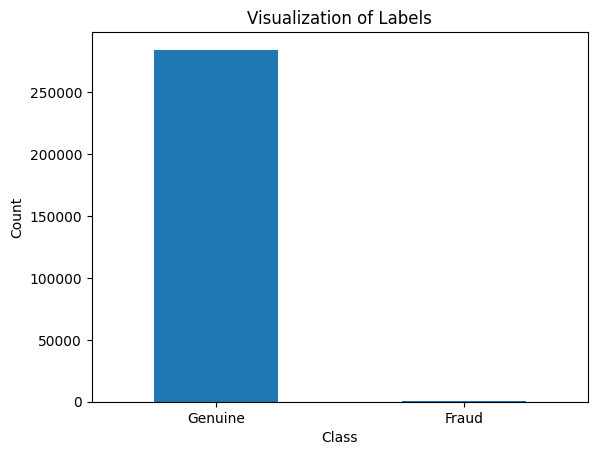

In [11]:
import matplotlib.pyplot as plt #import matplotlib to plot
labels = ["Genuine", "Fraud"] #define label as an array containing genuine and fraud
count_classes = dataset.value_counts(dataset['Class'], sort= True) #count in the dataset class values that have 1 (true)
count_classes.plot(kind = "bar", rot = 0) #plot the result in the previous code i.e. count_classes as a bar chart against classes with 0 values
plt.title("Visualization of Labels") #Title of the plot
plt.ylabel("Count") #the y axis is count
plt.xticks(range(2), labels) #the x axis have two elements genuine and fraud defined in labels
plt.show() #show the plot

The essence of the above is to see how small the number of fraud transactions are compared to the number of genuine transactions. Another way to achieve this is a pie chart.


<Axes: ylabel=' '>

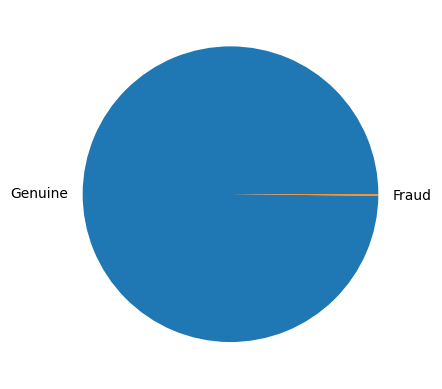

In [12]:
# To see how small the number of Fraud transactions are
data_copy = dataset.copy() #creating a copy of the dataset and defining it as data_copy
data_copy[" "] = np.where(data_copy["Class"] == 1 ,  "Fraud", "Genuine")#redefine data_copy by using numpy to search through data_copy to identify the Class columns with value 1 as Fraud and others as genuine


# plot a pie chart
data_copy[" "].value_counts().plot(kind="pie") #plot a piechart that shows the number of both counts of 0's and 1's in Class column

We can observe that genuine transactions are over 99% while we have about 1% fradulent transactions. Further analysis of other relevant data may reveal details about the fraudulent transactions.